### Import Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

### Load Dataset

In [2]:
# Loead trained and test data
train_data = np.load('simu_20000_0.1_90_140_train.npy')
test_data = np.load('simu_10000_0.1_141_178_test.npy')

print("The shape of trained data is: ",train_data.shape)
print("The shape of tested data is: ",test_data.shape)  

The shape of trained data is:  (20000, 1006)
The shape of tested data is:  (10000, 1006)


- In the data file, each row includes sensor data (10 seconds * 100Hz) + ID + Time + H + R + S + D 
- H, R, S and D are heartrate, respiratory rate, systolic and diastolic blood pressure

In [3]:
train_data[0]

array([-2.45845714e-07, -2.06162897e-07,  1.56348382e-06, ...,
        1.90000000e+01,  9.10000000e+01,  9.50000000e+01])

- Split dataset into train and test datasets and separating the labels from the features

In [4]:


X_train_data = train_data[:,0:1000]
y_train_data_systolic = train_data[:,-2]
y_train_data_diastolic = train_data[:,-1]

X_test_data = test_data[:,0:1000]
y_test_data_systolic = test_data[:,-2]
y_test_data_diastolic = test_data[:,-1]

# verify the shape of the data
print("The shape of X_train_data is: ",X_train_data.shape)
print("The shape of y_train_data_systolic is: ",y_train_data_systolic.shape)    
print("The shape of y_train_data_diastolic is: ",y_train_data_diastolic.shape)
print("The shape of X_test_data is: ",X_test_data.shape)
print("The shape of y_test_data_systolic is: ",y_test_data_systolic.shape)
print("The shape of y_test_data_diastolic is: ",y_test_data_diastolic.shape)    


The shape of X_train_data is:  (20000, 1000)
The shape of y_train_data_systolic is:  (20000,)
The shape of y_train_data_diastolic is:  (20000,)
The shape of X_test_data is:  (10000, 1000)
The shape of y_test_data_systolic is:  (10000,)
The shape of y_test_data_diastolic is:  (10000,)


In [5]:
print(type(train_data))

<class 'numpy.ndarray'>


Text(0.5, 1.0, 'The data distribution of the training data')

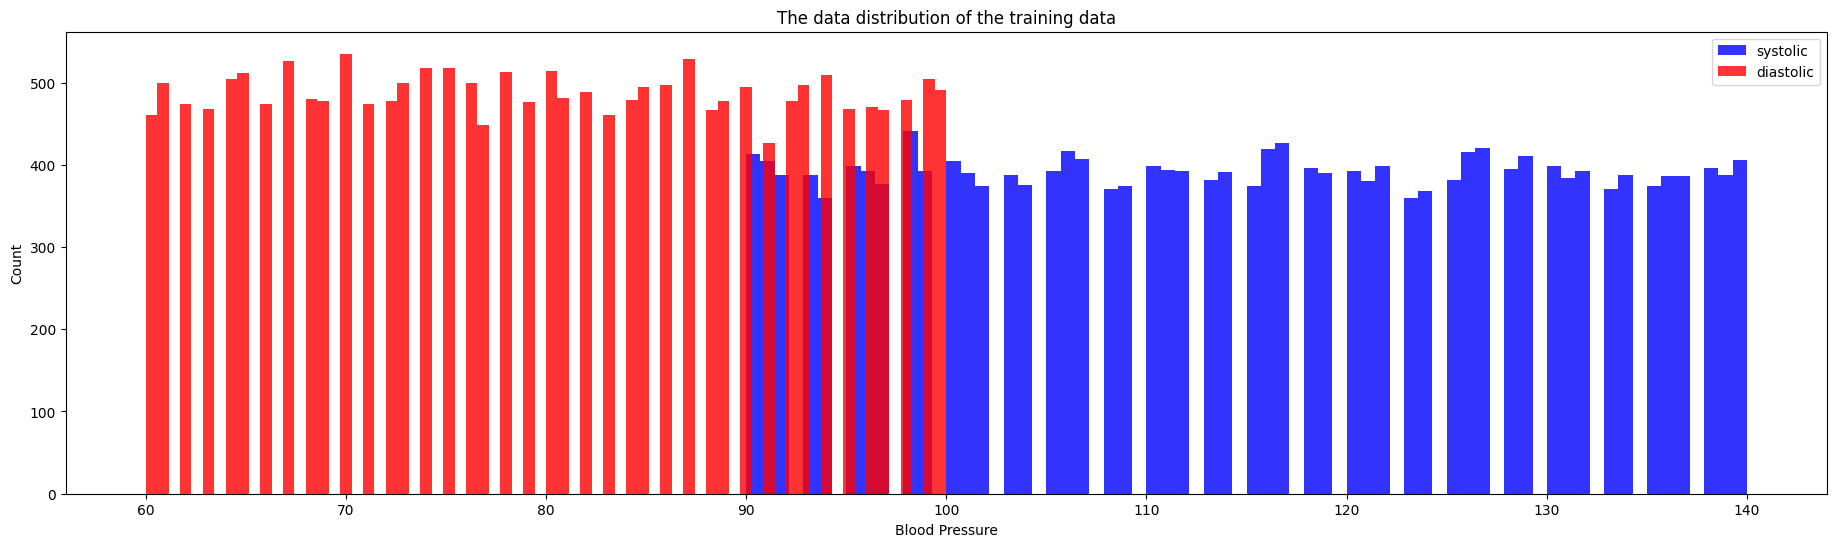

In [6]:
# Analyze the data distribution, normalizaiton and standardization 
# The data distribution of the training data
plt.figure(figsize=(50, 6))
plt.subplot(1,2,1)
plt.hist(y_train_data_systolic, bins=70, color='blue', alpha = 0.8, label='systolic')
plt.hist(y_train_data_diastolic, bins=70, color='red', alpha = 0.8,  label='diastolic')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.legend()
plt.title('The data distribution of the training data')


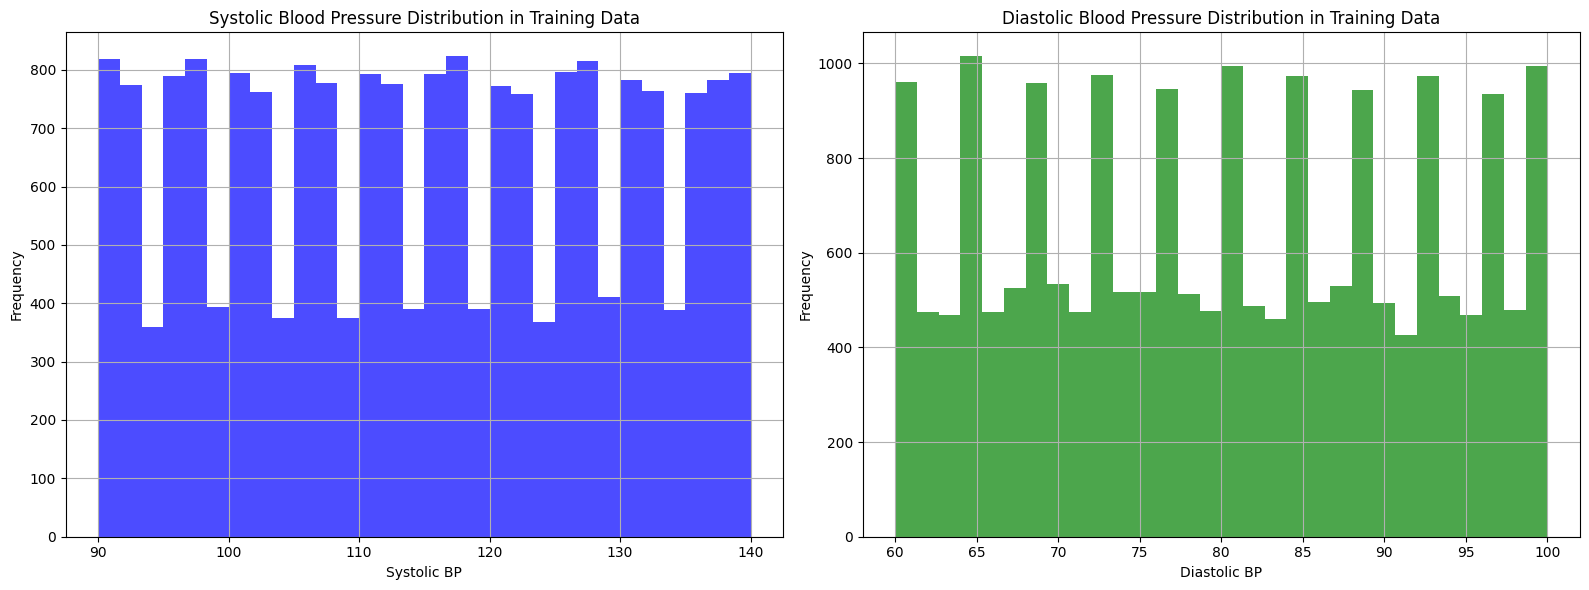

In [7]:
plt.figure(figsize=(16, 6))

# Systolic Blood Pressure Distribution in Training Data
plt.subplot(1, 2, 1)
plt.hist(y_train_data_systolic, bins=30, color='blue', alpha=0.7, label='Systolic BP')
plt.title('Systolic Blood Pressure Distribution in Training Data')
plt.xlabel('Systolic BP')
plt.ylabel('Frequency')
plt.grid(True)

# Diastolic Blood Pressure Distribution in Training Data
plt.subplot(1, 2, 2)
plt.hist(y_train_data_diastolic, bins=30, color='green', alpha=0.7, label='Diastolic BP')
plt.title('Diastolic Blood Pressure Distribution in Training Data')
plt.xlabel('Diastolic BP')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

- Create a pairplot to visualize the relationship between Systolic and Diastolic BP

### Convert Data into CSV file 
- Save the train and test datasets into CSV files for better understanding
- first 1000 columns are features, last 2 columns are labels in training dataset
- Add header to csv file and name the labels and features
- pd.read_csv('train_data.csv', header=None).to_csv('train_data.csv', header=['f'+str(i) for i in range(1000)]+['systolic','diastolic'], index=False)

In [78]:

np.savetxt("train_data.csv", train_data, delimiter=",")
np.savetxt("test_data.csv", test_data, delimiter=",")



In [10]:

train_data = pd.read_csv('train_data.csv')
train_data.head()
print(train_data.shape)

(19999, 1006)


- Use iloc function to select the first 1000 rows of the dataset and last 2 columns in the dataset and save it in a new dataframe

In [11]:
selected_columns = list(range(0, 1000)) + [1004,1005]
training_data = train_data.iloc[:, selected_columns]

# save the training data in new file
training_data.to_csv('training_data.csv', index=False)

In [87]:
# For test data select 1000 rows and 2 columns for the test data
testing_data = pd.read_csv('test_data.csv')
selected_columns = list(range(0, 1000)) + [1004,1005]
test_data = testing_data.iloc[:, selected_columns]

# save the test data in new file
test_data.to_csv('testing_data.csv', index=False)


In [88]:
# Renaming the columns

pd.read_csv('testing_data.csv', header=None).to_csv('testing_data.csv', header=['f'+str(i) for i in range(1000)]+['systolic','diastolic'], index=False)


In [91]:
testing_data = pd.read_csv('testing_data.csv')
testing_data.head()
print(testing_data.shape)
print(testing_data.describe())

(10000, 1002)
                 f0            f1            f2            f3            f4  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  10000.000000   
mean   2.181875e-09  9.267560e-08  8.767392e-07  3.074308e-06      0.000004   
std    2.919226e-07  3.093874e-07  9.178667e-07  2.359131e-06      0.000003   
min   -1.529780e-06 -1.431564e-06 -1.158516e-06 -7.241372e-07     -0.000004   
25%   -1.647431e-07 -9.117877e-08  1.950479e-07  9.002181e-07      0.000002   
50%    5.514851e-09  7.768466e-08  6.001074e-07  2.596839e-06      0.000004   
75%    1.649444e-07  2.665488e-07  1.371238e-06  5.235068e-06      0.000006   
max    2.039652e-06  2.488680e-06  4.843624e-06  8.916655e-06      0.000009   

                 f5            f6            f7            f8            f9  \
count  1.000000e+04  10000.000000  10000.000000  1.000000e+04  1.000000e+04   
mean   2.501772e-06      0.000002      0.000001  1.015568e-06  5.671894e-07   
std    3.682609e-06      0.000004    

- Shape of data after renaming labels and features

In [79]:
print(training_data.shape)
print(test_data.shape)

(20000, 1002)
(10000, 1006)


- That means that extra labels are removed

- Adding labels and features to the new dataframe

In [12]:
training_data.head()

,-2.458457138179582314e-07,-2.061628966227813561e-07,1.563483823366793026e-06,5.695118803582858225e-06,-3.201164678413224105e-06,2.597859420543783198e-06,-1.619477303130381509e-06,4.295957207937502546e-07,2.811668138492965922e-07,-7.627104550809248276e-07,...,-2.012992565671966181e-07,-2.175612986897299234e-07,-2.369470211178174729e-07,-2.294532760496779053e-07,-2.023100468262023668e-07,-1.927278584063952293e-07,-2.168651015420372932e-07,-2.393928158602529831e-07,9.100000000000000000e+01,9.500000000000000000e+01
0,2.703969e-07,4.127405e-07,0.000003,0.000007,-0.000001,-3.482201e-09,5.662856e-07,1.321577e-07,9.194240e-08,6.640148e-07,...,1.322118e-07,1.479012e-07,1.587980e-07,1.658027e-07,1.712124e-07,1.769987e-07,1.821953e-07,1.845795e-07,101.0,61.0
1,1.975525e-07,5.929467e-07,0.000005,0.000006,-0.000004,2.734216e-06,-1.420571e-06,1.529121e-06,-5.406525e-07,4.429806e-07,...,4.466840e-07,3.971668e-07,3.478368e-07,3.011470e-07,2.585474e-07,2.226035e-07,1.979552e-07,1.892261e-07,131.0,81.0
2,2.647346e-08,3.576314e-07,0.000005,0.000004,-0.000003,2.490793e-06,-1.057064e-06,2.985681e-07,2.723785e-07,-1.193004e-07,...,1.628922e-07,1.465877e-07,1.263324e-07,1.077481e-07,9.278924e-08,7.921746e-08,6.586452e-08,5.828815e-08,98.0,61.0
3,7.834318e-08,3.751510e-07,0.000003,0.000007,-0.000002,-8.854182e-07,1.466943e-06,-1.357495e-06,1.083601e-06,-5.930964e-07,...,1.093727e-07,1.212996e-07,1.320010e-07,1.413852e-07,1.496382e-07,1.571355e-07,1.629898e-07,1.653973e-07,139.0,93.0
4,-6.450565e-08,6.216832e-08,0.000003,0.000005,-0.000003,2.332594e-06,-5.369354e-07,-2.243157e-07,8.786636e-07,-2.362930e-07,...,-1.981486e-09,-2.374281e-08,-4.781114e-08,-7.117731e-08,-9.144242e-08,-1.080692e-07,-1.206526e-07,-1.265353e-07,116.0,96.0


### Specify Features and Labels 
- Adding header to the training data, first 1000 colums are features and last 2 columns are labels

In [17]:

pd.read_csv('training_data.csv', header=None).to_csv('training_data.csv', header=['f'+str(i) for i in range(1000)]+['systolic','diastolic'], index=False)


In [53]:
training_data = pd.read_csv('training_data.csv')
training_data.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f992,f993,f994,f995,f996,f997,f998,f999,systolic,diastolic
0,-2.458457e-07,-2.061629e-07,0.000002,0.000006,-0.000003,2.597859e-06,-1.619477e-06,4.295957e-07,2.811668e-07,-7.627105e-07,...,-2.012993e-07,-2.175613e-07,-2.369470e-07,-2.294533e-07,-2.023100e-07,-1.927279e-07,-2.168651e-07,-2.393928e-07,91.0,95.0
1,2.703969e-07,4.127405e-07,0.000003,0.000007,-0.000001,-3.482201e-09,5.662856e-07,1.321577e-07,9.194240e-08,6.640148e-07,...,1.322118e-07,1.479012e-07,1.587980e-07,1.658027e-07,1.712124e-07,1.769987e-07,1.821953e-07,1.845795e-07,101.0,61.0
2,1.975525e-07,5.929467e-07,0.000005,0.000006,-0.000004,2.734216e-06,-1.420571e-06,1.529121e-06,-5.406525e-07,4.429806e-07,...,4.466840e-07,3.971668e-07,3.478368e-07,3.011470e-07,2.585474e-07,2.226035e-07,1.979552e-07,1.892261e-07,131.0,81.0
3,2.647346e-08,3.576314e-07,0.000005,0.000004,-0.000003,2.490793e-06,-1.057064e-06,2.985681e-07,2.723785e-07,-1.193004e-07,...,1.628922e-07,1.465877e-07,1.263324e-07,1.077481e-07,9.278924e-08,7.921746e-08,6.586452e-08,5.828815e-08,98.0,61.0
4,7.834318e-08,3.751510e-07,0.000003,0.000007,-0.000002,-8.854182e-07,1.466943e-06,-1.357495e-06,1.083601e-06,-5.930964e-07,...,1.093727e-07,1.212996e-07,1.320010e-07,1.413852e-07,1.496382e-07,1.571355e-07,1.629898e-07,1.653973e-07,139.0,93.0


In [19]:
training_data.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f992,f993,f994,f995,f996,f997,f998,f999,systolic,diastolic
count,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,...,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,20000.000000
mean,5.551619e-09,1.867909e-07,1.978292e-06,0.000004,2.449290e-06,0.000002,1.171762e-06,6.008451e-07,1.681149e-07,-7.528682e-08,...,-1.613818e-09,-2.437904e-09,-2.868573e-09,-2.578473e-09,-2.047825e-09,-2.234030e-09,-3.352795e-09,-4.395637e-09,114.960450,79.924550
std,2.603428e-07,3.335638e-07,1.785615e-06,0.000003,3.583105e-06,0.000004,3.406377e-06,2.961528e-06,2.391985e-06,1.883020e-06,...,2.154138e-07,2.138747e-07,2.175529e-07,2.256439e-07,2.374275e-07,2.487995e-07,2.571078e-07,2.613764e-07,14.724871,11.801259
min,-1.793686e-06,-1.568434e-06,-1.018944e-06,-0.000004,-4.993736e-06,-0.000005,-5.495883e-06,-5.214801e-06,-5.735105e-06,-5.263485e-06,...,-1.601907e-06,-1.654153e-06,-1.701984e-06,-1.749347e-06,-1.787229e-06,-1.805288e-06,-1.806422e-06,-1.803319e-06,90.000000,60.000000
25%,-1.393997e-07,-1.720225e-08,4.751398e-07,0.000002,-4.012955e-07,-0.000002,-1.459197e-06,-1.393680e-06,-1.222662e-06,-9.741424e-07,...,-1.263677e-07,-1.254248e-07,-1.286080e-07,-1.310943e-07,-1.344791e-07,-1.403765e-07,-1.453624e-07,-1.506115e-07,102.000000,70.000000
50%,5.970796e-09,1.468900e-07,1.428850e-06,0.000004,2.746992e-06,0.000002,7.022195e-07,2.074929e-07,1.930822e-08,-2.015678e-08,...,-1.804914e-09,-2.524032e-09,-3.115244e-09,-1.618551e-09,-1.305756e-09,-7.212414e-10,-1.735693e-09,-1.916262e-09,115.000000,80.000000
75%,1.510920e-07,3.569384e-07,3.199914e-06,0.000006,5.642908e-06,0.000005,3.115088e-06,2.032591e-06,1.287257e-06,8.164234e-07,...,1.212317e-07,1.218483e-07,1.231548e-07,1.252261e-07,1.314081e-07,1.358912e-07,1.397849e-07,1.414297e-07,128.000000,90.000000
max,1.619504e-06,2.498476e-06,8.185603e-06,0.000009,9.514414e-06,0.000009,9.332580e-06,9.310749e-06,9.246607e-06,9.387921e-06,...,1.285472e-06,1.315167e-06,1.334379e-06,1.342530e-06,1.386629e-06,1.424915e-06,1.445962e-06,1.451926e-06,140.000000,100.000000


In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 1006 entries, -2.458457138179582314e-07 to 9.500000000000000000e+01
dtypes: float64(1006)
memory usage: 153.5 MB


<AxesSubplot: xlabel='systolic', ylabel='diastolic'>

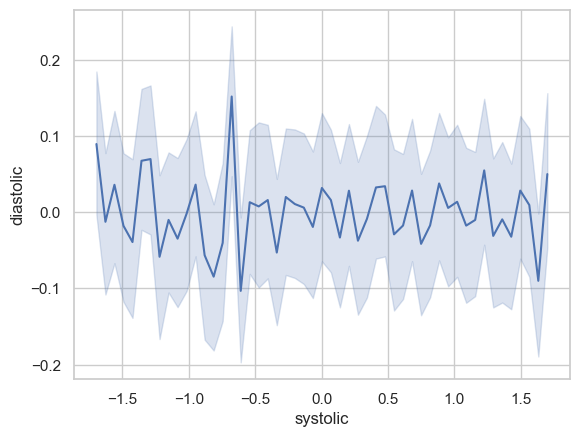

In [73]:
# use line plot to show the data distribution of the training data with time series 
sns.lineplot(data=training_data, x="systolic", y="diastolic")

### Data Wrangling
- It is a process of cleaning, transforming and organizing data so that it is easier to do data analysis on it
- It makes data consistent, accurate and useful for analysis and decision making

In [20]:
# check missing values
print(training_data.isnull().sum())


f0           0
f1           0
f2           0
f3           0
f4           0
            ..
f997         0
f998         0
f999         0
systolic     0
diastolic    0
Length: 1002, dtype: int64


In [32]:
print (training_data['systolic'].value_counts())
# print (training_data['diastolic'].value_counts())



98.0     441
117.0    427
127.0    420
116.0    419
106.0    417
126.0    415
90.0     413
129.0    411
107.0    407
140.0    406
91.0     405
100.0    404
130.0    398
122.0    398
95.0     398
110.0    398
138.0    396
118.0    396
128.0    395
111.0    394
99.0     393
132.0    393
112.0    393
120.0    393
105.0    392
96.0     392
114.0    391
101.0    390
119.0    390
103.0    388
139.0    388
134.0    388
92.0     387
93.0     387
136.0    386
137.0    386
131.0    384
113.0    382
125.0    381
121.0    380
97.0     377
104.0    375
135.0    374
102.0    374
109.0    374
115.0    374
133.0    371
108.0    371
124.0    368
94.0     360
123.0    360
Name: systolic, dtype: int64


### Removing Duplicated Values
- No need for removing dupplicates

In [39]:
# Finding duplicate rows for systolic and diastolic
training_data.duplicated(subset=['systolic','diastolic']).sum()

17909

In [40]:
df_duplicates = training_data[training_data.duplicated(subset=['systolic','diastolic'])]
df_duplicates.head()


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f992,f993,f994,f995,f996,f997,f998,f999,systolic,diastolic
30,-2.126623e-07,-1.704307e-07,2.618538e-07,2.179275e-06,5.764447e-06,0.000006,-3.502800e-07,-4.284668e-06,1.099975e-06,2.095664e-06,...,2.353180e-07,3.067803e-07,3.774430e-07,4.425605e-07,4.991948e-07,5.449729e-07,5.762801e-07,5.879487e-07,122.0,86.0
55,-1.385007e-07,2.819171e-07,5.548841e-06,3.776992e-07,1.857883e-07,-0.000002,1.059691e-06,-5.862055e-07,-1.577170e-07,-6.931677e-08,...,-1.069994e-07,-6.635027e-08,-3.026935e-08,-1.022265e-08,1.060727e-09,2.458169e-08,6.164973e-08,8.607092e-08,109.0,76.0
65,-9.112049e-09,2.137806e-07,1.904273e-06,6.052737e-06,6.608368e-06,-0.000001,-3.196067e-06,2.712654e-06,-6.969177e-08,-1.254058e-06,...,3.216704e-07,2.589762e-07,1.913480e-07,1.238612e-07,6.204793e-08,1.196094e-08,-2.107498e-08,-3.279445e-08,131.0,67.0
90,-2.662689e-07,-2.325882e-07,6.682521e-07,4.966230e-06,1.963714e-06,-0.000003,1.938447e-06,-1.687362e-06,4.835908e-07,-1.334987e-07,...,2.692618e-07,3.325955e-07,3.930624e-07,4.446296e-07,4.876458e-07,5.244120e-07,5.526727e-07,5.644824e-07,94.0,61.0
132,1.635507e-07,1.803895e-07,5.380465e-07,2.715036e-06,6.424383e-06,0.000003,-3.765182e-06,1.251978e-06,1.253590e-06,-1.835903e-06,...,-4.703965e-08,-2.721221e-08,-8.259752e-09,1.014448e-08,2.673507e-08,3.914890e-08,4.596609e-08,4.781022e-08,138.0,62.0


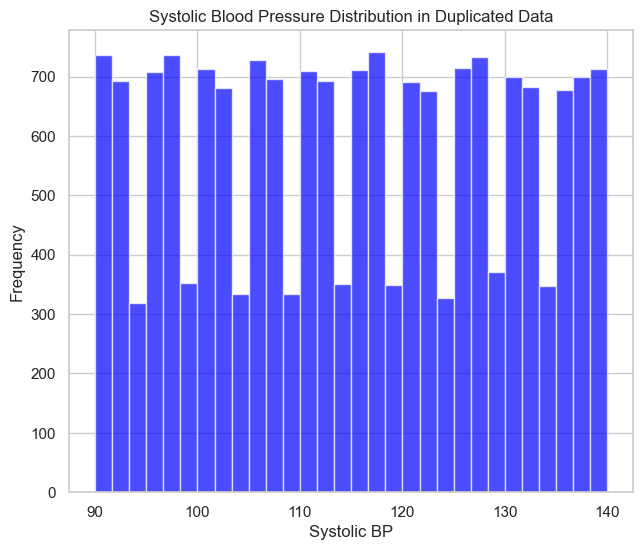

In [41]:
# plot duplicated values
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.hist(df_duplicates['systolic'], bins=30, color='blue', alpha=0.7, label='Systolic BP')
plt.title('Systolic Blood Pressure Distribution in Duplicated Data')
plt.xlabel('Systolic BP')
plt.ylabel('Frequency')
plt.grid(True)


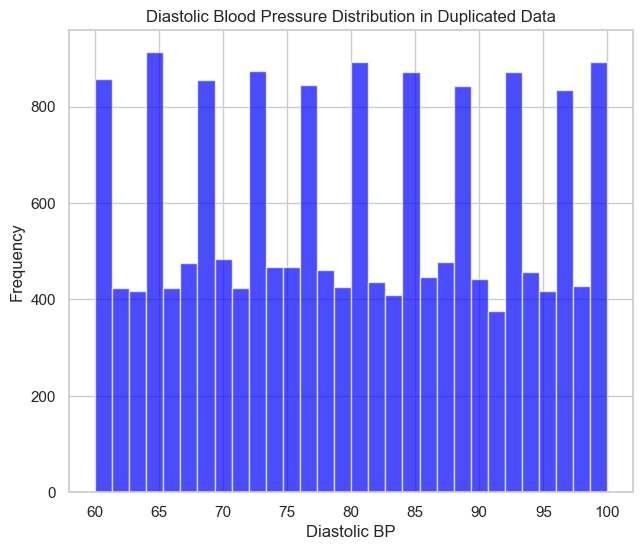

In [46]:
# plot duplicated values
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.hist(df_duplicates['diastolic'], bins=30, color='blue', alpha=0.7, label='Dyastolic BP')
plt.title('Diastolic Blood Pressure Distribution in Duplicated Data')
plt.xlabel('Diastolic BP')
plt.ylabel('Frequency')
plt.grid(True)

In [63]:
df= training_data

In [43]:
# df_duplicates = df[df.duplicated(subset=['systolic','diastolic'])]
# df_duplicates.head()



,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f992,f993,f994,f995,f996,f997,f998,f999,systolic,diastolic
30,-2.126623e-07,-1.704307e-07,2.618538e-07,2.179275e-06,5.764447e-06,0.000006,-3.502800e-07,-4.284668e-06,1.099975e-06,2.095664e-06,...,2.353180e-07,3.067803e-07,3.774430e-07,4.425605e-07,4.991948e-07,5.449729e-07,5.762801e-07,5.879487e-07,122.0,86.0
55,-1.385007e-07,2.819171e-07,5.548841e-06,3.776992e-07,1.857883e-07,-0.000002,1.059691e-06,-5.862055e-07,-1.577170e-07,-6.931677e-08,...,-1.069994e-07,-6.635027e-08,-3.026935e-08,-1.022265e-08,1.060727e-09,2.458169e-08,6.164973e-08,8.607092e-08,109.0,76.0
65,-9.112049e-09,2.137806e-07,1.904273e-06,6.052737e-06,6.608368e-06,-0.000001,-3.196067e-06,2.712654e-06,-6.969177e-08,-1.254058e-06,...,3.216704e-07,2.589762e-07,1.913480e-07,1.238612e-07,6.204793e-08,1.196094e-08,-2.107498e-08,-3.279445e-08,131.0,67.0
90,-2.662689e-07,-2.325882e-07,6.682521e-07,4.966230e-06,1.963714e-06,-0.000003,1.938447e-06,-1.687362e-06,4.835908e-07,-1.334987e-07,...,2.692618e-07,3.325955e-07,3.930624e-07,4.446296e-07,4.876458e-07,5.244120e-07,5.526727e-07,5.644824e-07,94.0,61.0
132,1.635507e-07,1.803895e-07,5.380465e-07,2.715036e-06,6.424383e-06,0.000003,-3.765182e-06,1.251978e-06,1.253590e-06,-1.835903e-06,...,-4.703965e-08,-2.721221e-08,-8.259752e-09,1.014448e-08,2.673507e-08,3.914890e-08,4.596609e-08,4.781022e-08,138.0,62.0


In [44]:
# df.drop_duplicates(subset=['systolic','diastolic'], inplace=True)

In [55]:
df.shape
# training_data.shape

(20000, 1002)

AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


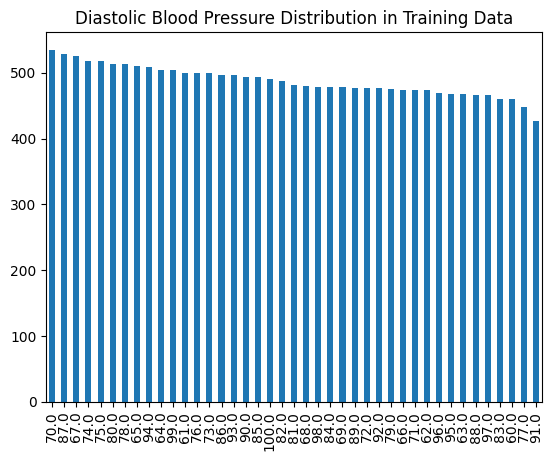

In [31]:
print(training_data['systolic'].value_counts().plot(kind='bar', title='Systolic Blood Pressure Distribution in Training Data'))
print(training_data['diastolic'].value_counts().plot(kind='bar', title='Diastolic Blood Pressure Distribution in Training Data'))


### Checking outliers
- Box plot gives better understanding of distribution of potential outliers

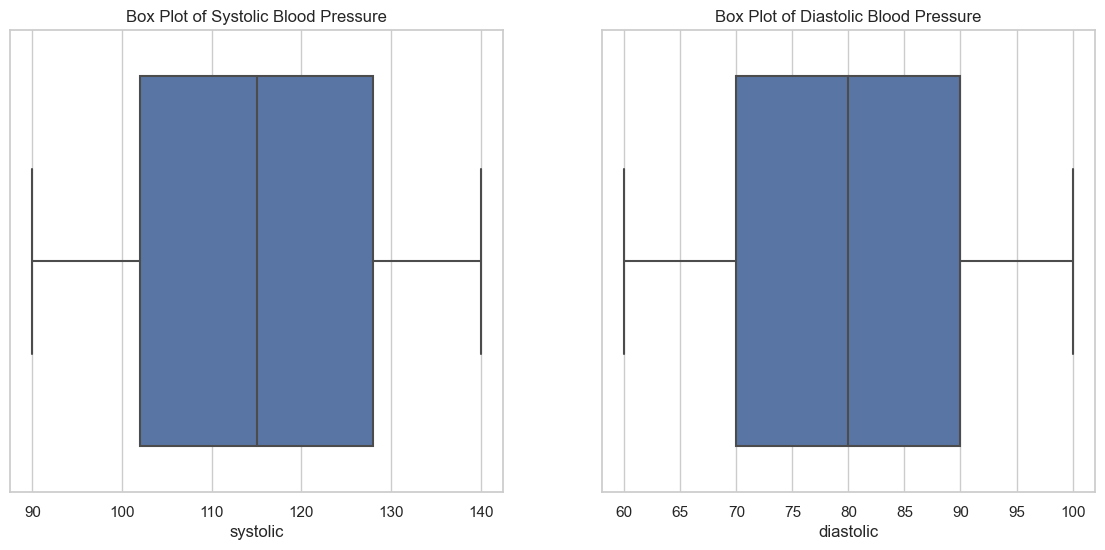

In [34]:
# Set the style for the visualization
sns.set(style="whitegrid")

# Create a figure and a set of subplots (2 subplots for systolic and diastolic)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create a boxplot for systolic blood pressure
sns.boxplot(x=training_data['systolic'], ax=axes[0])
axes[0].set_title('Box Plot of Systolic Blood Pressure')

# Create a boxplot for diastolic blood pressure
sns.boxplot(x=training_data['diastolic'], ax=axes[1])
axes[1].set_title('Box Plot of Diastolic Blood Pressure')

# Show the plots
plt.show()


- No outliers present

### Mean of Blood Pressures

In [35]:
Systolic_mean = training_data['systolic'].mean()
Diastolic_mean = training_data['diastolic'].mean()
print("The mean of Systolic Blood Pressure is: ", Systolic_mean)
print("The mean of Diastolic Blood Pressure is: ", Diastolic_mean)

The mean of Systolic Blood Pressure is:  114.96045
The mean of Diastolic Blood Pressure is:  79.92455


### Data Normalization

1. Min-Max Normalization : In this approach, the data is scaled to a fixed range - usually 0 to 1.
2. Standard Scaling : It centers the data around mean 0 and standard deviation 1. It is more effective if the standard deviation is different from feature to feature. It is more useful for classification than regression. Its formula is given by: z = (x - u) / s. Its range is from -3 to +3. It is also called Z-score normalization.
3. Log Transformation : With this transformation, values become scales based on their own distribution instead of the distribution of the initial variable. It is useful for data which is not normally distributed. It is also useful when you want to reduce the range of values from 0 to 1. Its formula is given by: z = log(x). Its range is from -infinity to +infinity.

In [64]:
# 1. import libraries

#2. data

# 3. select columns to normalize
col_to_norm = ['systolic', 'diastolic']

# 4. create scaler 
# scaler = MinMaxScaler()
scaler = StandardScaler()  # Change scaling unit

# 5. fit and transform data on scaler or vice versa
df[col_to_norm] = scaler.fit_transform(df[col_to_norm])

# 6. check the result
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f992,f993,f994,f995,f996,f997,f998,f999,systolic,diastolic
0,-2.458457e-07,-2.061629e-07,0.000002,0.000006,-0.000003,2.597859e-06,-1.619477e-06,4.295957e-07,2.811668e-07,-7.627105e-07,...,-2.012993e-07,-2.175613e-07,-2.369470e-07,-2.294533e-07,-2.023100e-07,-1.927279e-07,-2.168651e-07,-2.393928e-07,-1.627250,1.277476
1,2.703969e-07,4.127405e-07,0.000003,0.000007,-0.000001,-3.482201e-09,5.662856e-07,1.321577e-07,9.194240e-08,6.640148e-07,...,1.322118e-07,1.479012e-07,1.587980e-07,1.658027e-07,1.712124e-07,1.769987e-07,1.821953e-07,1.845795e-07,-0.948110,-1.603644
2,1.975525e-07,5.929467e-07,0.000005,0.000006,-0.000004,2.734216e-06,-1.420571e-06,1.529121e-06,-5.406525e-07,4.429806e-07,...,4.466840e-07,3.971668e-07,3.478368e-07,3.011470e-07,2.585474e-07,2.226035e-07,1.979552e-07,1.892261e-07,1.089310,0.091132
3,2.647346e-08,3.576314e-07,0.000005,0.000004,-0.000003,2.490793e-06,-1.057064e-06,2.985681e-07,2.723785e-07,-1.193004e-07,...,1.628922e-07,1.465877e-07,1.263324e-07,1.077481e-07,9.278924e-08,7.921746e-08,6.586452e-08,5.828815e-08,-1.151852,-1.603644
4,7.834318e-08,3.751510e-07,0.000003,0.000007,-0.000002,-8.854182e-07,1.466943e-06,-1.357495e-06,1.083601e-06,-5.930964e-07,...,1.093727e-07,1.212996e-07,1.320010e-07,1.413852e-07,1.496382e-07,1.571355e-07,1.629898e-07,1.653973e-07,1.632622,1.107998


In [ ]:
# Log transformation
df['systolic'] = np.log(df['systolic'])
df['diastolic'] = np.log(df['diastolic'])


In [65]:
df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f992,f993,f994,f995,f996,f997,f998,f999,systolic,diastolic
count,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,...,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,5.551619e-09,1.867909e-07,1.978292e-06,0.000004,2.449290e-06,0.000002,1.171762e-06,6.008451e-07,1.681149e-07,-7.528682e-08,...,-1.613818e-09,-2.437904e-09,-2.868573e-09,-2.578473e-09,-2.047825e-09,-2.234030e-09,-3.352795e-09,-4.395637e-09,3.197442e-17,3.836931e-17
std,2.603428e-07,3.335638e-07,1.785615e-06,0.000003,3.583105e-06,0.000004,3.406377e-06,2.961528e-06,2.391985e-06,1.883020e-06,...,2.154138e-07,2.138747e-07,2.175529e-07,2.256439e-07,2.374275e-07,2.487995e-07,2.571078e-07,2.613764e-07,1.000025e+00,1.000025e+00
min,-1.793686e-06,-1.568434e-06,-1.018944e-06,-0.000004,-4.993736e-06,-0.000005,-5.495883e-06,-5.214801e-06,-5.735105e-06,-5.263485e-06,...,-1.601907e-06,-1.654153e-06,-1.701984e-06,-1.749347e-06,-1.787229e-06,-1.805288e-06,-1.806422e-06,-1.803319e-06,-1.695164e+00,-1.688383e+00
25%,-1.393997e-07,-1.720225e-08,4.751398e-07,0.000002,-4.012955e-07,-0.000002,-1.459197e-06,-1.393680e-06,-1.222662e-06,-9.741424e-07,...,-1.263677e-07,-1.254248e-07,-1.286080e-07,-1.310943e-07,-1.344791e-07,-1.403765e-07,-1.453624e-07,-1.506115e-07,-8.801961e-01,-8.409948e-01
50%,5.970796e-09,1.468900e-07,1.428850e-06,0.000004,2.746992e-06,0.000002,7.022195e-07,2.074929e-07,1.930822e-08,-2.015678e-08,...,-1.804914e-09,-2.524032e-09,-3.115244e-09,-1.618551e-09,-1.305756e-09,-7.212414e-10,-1.735693e-09,-1.916262e-09,2.685999e-03,6.393545e-03
75%,1.510920e-07,3.569384e-07,3.199914e-06,0.000006,5.642908e-06,0.000005,3.115088e-06,2.032591e-06,1.287257e-06,8.164234e-07,...,1.212317e-07,1.218483e-07,1.231548e-07,1.252261e-07,1.314081e-07,1.358912e-07,1.397849e-07,1.414297e-07,8.855681e-01,8.537819e-01
max,1.619504e-06,2.498476e-06,8.185603e-06,0.000009,9.514414e-06,0.000009,9.332580e-06,9.310749e-06,9.246607e-06,9.387921e-06,...,1.285472e-06,1.315167e-06,1.334379e-06,1.342530e-06,1.386629e-06,1.424915e-06,1.445962e-06,1.451926e-06,1.700536e+00,1.701170e+00


<AxesSubplot: xlabel='systolic', ylabel='diastolic'>

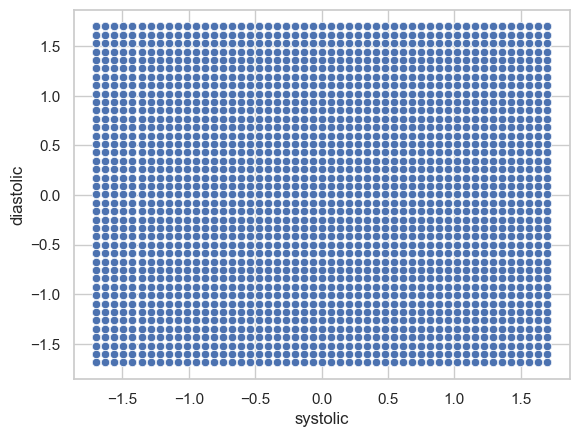

In [66]:
sns.scatterplot(x='systolic', y='diastolic', data=df)
plt.title('Scatter Plot of Systolic and Diastolic Blood Pressure')


<AxesSubplot: xlabel='f1', ylabel='diastolic'>

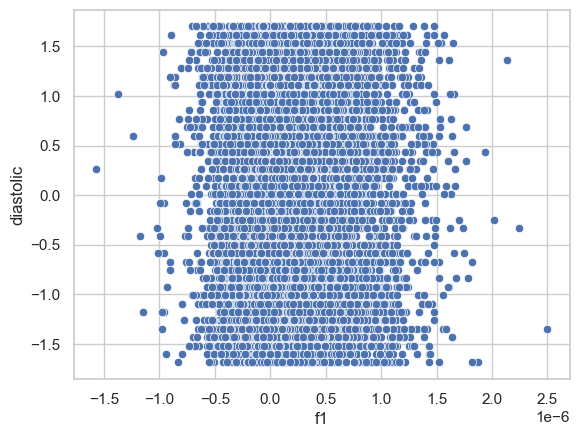

In [71]:
sns.scatterplot(x='f1', y='diastolic', data=df)

<AxesSubplot: xlabel='systolic', ylabel='diastolic'>

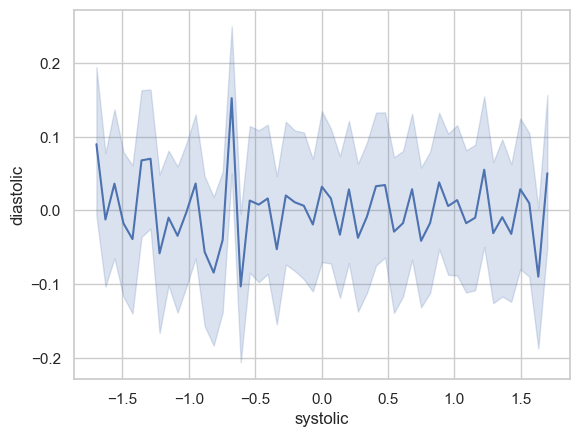

In [72]:
sns.lineplot(data=df, x="systolic", y="diastolic")

<AxesSubplot: xlabel='f1', ylabel='diastolic'>

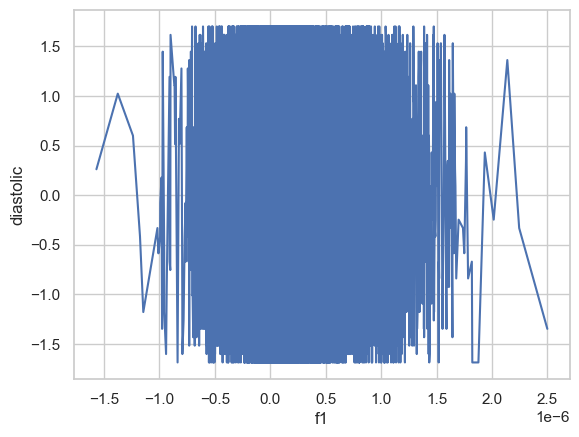

In [74]:
sns.lineplot(data=df, x="f1", y="diastolic")

In [ ]:
# Check bar plot
# y_train_data_systolic_bar = np.unique(y_train_data_systolic, return_counts=True)
# y_train_data_diastolic_bar = np.unique(y_train_data_diastolic, return_counts=True)

y_train_data_systolic.value_counts().plot.bar()



### Import Libraries for Machine learning

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
# SVC is for classification
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# xgboost
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# This is regression problem so we import all models of regression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.model_selection import train_test_split    



In [112]:
# Split training data into features and labels
# In csv file we have to use iloc function to select the columns

training_data = training_data.iloc[:,0:1000]
training_data_systolic = training_data.iloc[:,-2]
training_data_diastolic = training_data.iloc[:,-1]

testing_data = testing_data.iloc[:,0:1000]
testing_data_systolic = testing_data.iloc[:,-2]
testing_data_diastolic = testing_data.iloc[:,-1]

# Shapes of test and train data
print("The shape of X_train_data is: ",training_data.shape)
print("The shape of y_train_data_systolic is: ",training_data_systolic.shape)
print("The shape of y_train_data_diastolic is: ",training_data_diastolic.shape)
print("The shape of X_test_data is: ",testing_data.shape)
print("The shape of y_test_data_systolic is: ",testing_data_systolic.shape)
print("The shape of y_test_data_diastolic is: ",testing_data_diastolic.shape)


The shape of X_train_data is:  (20000, 1000)
The shape of y_train_data_systolic is:  (20000,)
The shape of y_train_data_diastolic is:  (20000,)
The shape of X_test_data is:  (10000, 1000)
The shape of y_test_data_systolic is:  (10000,)
The shape of y_test_data_diastolic is:  (10000,)


In [121]:
training_data_systolic.describe()

count    2.000000e+04
mean    -3.352795e-09
std      2.571078e-07
min     -1.806422e-06
25%     -1.453624e-07
50%     -1.735693e-09
75%      1.397849e-07
max      1.445962e-06
Name: f998, dtype: float64

In [122]:
# Apply gradient bosting algorithm
# Create a gradient boosting regressor object
# just train 20% data
X_train, X_test, y_train, y_test = train_test_split(training_data, training_data_systolic, train_size=0.3)

gradient_boosting_regressor = GradientBoostingRegressor()
# model = gradient_boosting_regressor.fit(training_data, training_data_systolic)
# prediction = model.predict(testing_data)
# mean_absolute_error((testing_data_systolic, prediction))
model = gradient_boosting_regressor.fit(X_train, X)

TypeError: mean_absolute_error() missing 1 required positional argument: 'y_pred'

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, n_targets=2, random_state=42)
y = y.reshape(-1, 2)  # Reshape y to have 2 output columns

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Wrap the GradientBoostingRegressor with MultiOutputRegressor
multi_output_regressor = MultiOutputRegressor(gb_regressor)

# Train the model
multi_output_regressor.fit(X_train, y_train)

# Make predictions
y_pred = multi_output_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")




In [ ]:
# use for loop to find the best model and calculate mean absolute error of each model both for systolic and diastolic blood pressure

models = [LogisticRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), KNeighborsRegressor(), MLPRegressor()]
model_names = ['LogisticRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'KNeighborsRegressor', 'MLPRegressor']
mae = []
for model, model_names in zip(models, model_names):
    # model = models[model]
    model.fit(training_data, training_data_systolic)
    prediction = model.predict(testing_data)
    mae.append(mean_absolute_error(testing_data_systolic, prediction))
    print(model_names, ' : ', mean_absolute_error(testing_data_systolic, prediction))

# use for loop to find the best model and calculate mean absolute error of each model both for systolic and diastolic blood pressure


In [ ]:
models = []